**Using Colab to apply MPT and plot Efficient Frontier by calculating weightage of stocks**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
#Import portfolio equity data from spreadsheet in Google Drive
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vRkQCSPhhX6OBUA6XcdAb_DUsF9RTT8O8wDXh704ZqB0_-qyzALGhYTsXrje1TN3pULRaJ3N4UY_c6P/pub?gid=0&single=true&output=csv')
df.head()

,Date,AAPL,FB,GOOGL,MSFT,PG,SBUX
0,1451624400,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0
1,1451710800,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0
2,1451797200,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0
3,1451883600,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0
4,1451970000,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0


In [ ]:
#converting unix timestamp into regular date format
df['Date']= pd.to_datetime(df['Date'], unit='s').dt.date
df.head()

,Date,AAPL,FB,GOOGL,MSFT,PG,SBUX
0,2016-01-01,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0
1,2016-01-02,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0
2,2016-01-03,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0
3,2016-01-04,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0
4,2016-01-05,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0


In [ ]:
#setting index to 'Date' column
df = df.set_index(pd.to_datetime(df['Date']))
df = df.drop('Date', axis=1)
df.head()

,AAPL,FB,GOOGL,MSFT,PG,SBUX
Date,,,,,,
2016-01-01,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0
2016-01-02,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0
2016-01-03,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0
2016-01-04,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0
2016-01-05,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0


**Plotting Stock Price Graph**

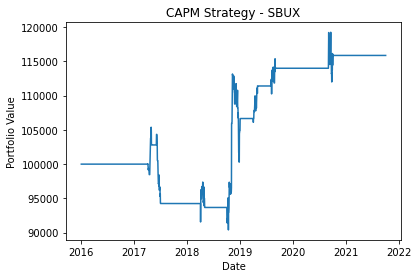

In [ ]:
plt.plot(df['SBUX'])
plt.title('CAPM Strategy - SBUX')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.show()

**Plotting co-variance and correlation matrix**

In [ ]:
#Co-variance matrix
# Log of percentage change
cov_matrix = df.pct_change().apply(lambda x: np.log(1+x)).cov()

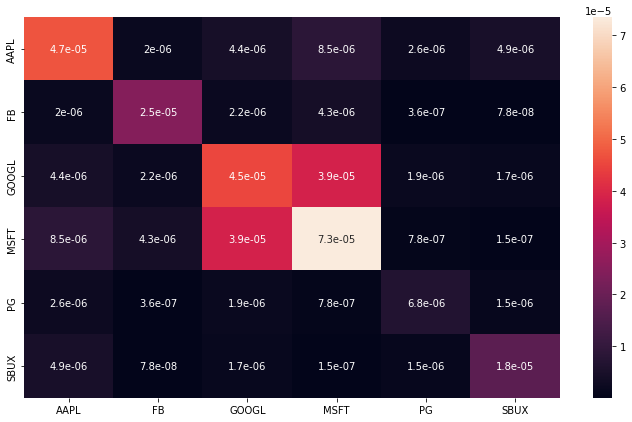

In [ ]:
plt.figure(figsize=(12,7))
cov_matrix_plot = sns.heatmap(cov_matrix, annot=True)

In [ ]:
#Correlation matrix
corr_matrix = df.pct_change().apply(lambda x: np.log(1+x)).corr()

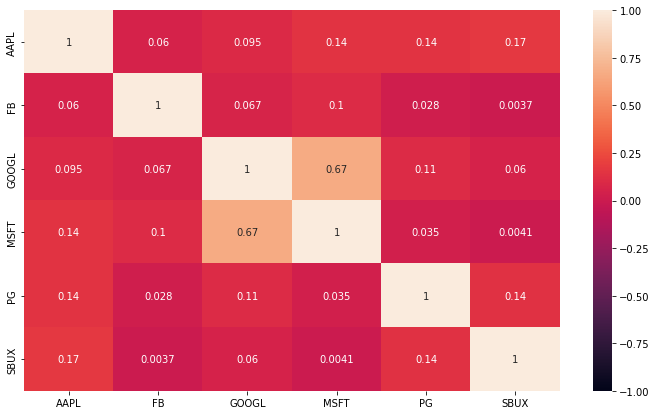

In [ ]:
plt.figure(figsize=(12,7))
corr_matrix_plot = sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True)

**Annual Returns**

In [ ]:
# Yearly returns for individual assets/strategies
ind_er = df.resample('Y').last().pct_change().mean() #for more than 1 year
ind_er

AAPL     0.094429
FB       0.030680
GOOGL   -0.013609
MSFT    -0.009967
PG       0.044105
SBUX     0.031732
dtype: float64

**Volatility**

In [ ]:
# Converting daily standard deviation to annual standard deviation
# Volatility is given by the annual standard deviation. We multiply by 250 because there are 250 trading days/year.
ann_sd = df.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))
ann_sd

AAPL     0.108564
FB       0.078412
GOOGL    0.106286
MSFT     0.135513
PG       0.041105
SBUX     0.066192
dtype: float64

**Comparison of Returns & Volatility of Assets/Strategies**

In [ ]:
# Creating a table for visualising returns and volatility of assets/strategies
assets = pd.concat([ind_er, ann_sd], axis=1) 
assets.columns = ['Returns', 'Volatility']
assets

,Returns,Volatility
AAPL,0.094429,0.108564
FB,0.030680,0.078412
GOOGL,-0.013609,0.106286
MSFT,-0.009967,0.135513
PG,0.044105,0.041105
SBUX,0.031732,0.066192


**Plotting Efficient Frontier**

In [ ]:
p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset/strategy weights

num_assets = len(df.columns)
num_portfolios = 100000 #number of portfolios to plot 

In [ ]:
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    
    returns = np.dot(weights, ind_er) # Returns are the product of individual expected returns of asset and its weights 
    p_ret.append(returns)
    
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd*np.sqrt(250) # Annual standard deviation = volatility
    p_vol.append(ann_sd)

In [ ]:
data = {'Returns':p_ret, 'Volatility':p_vol}

for counter, symbol in enumerate(df.columns.tolist()):
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]

**Dataframe of number of portfolios created**

In [ ]:
portfolios  = pd.DataFrame(data)
portfolios.head() 

,Returns,Volatility,AAPL weight,FB weight,GOOGL weight,MSFT weight,PG weight,SBUX weight
0,0.038383,0.051346,0.274177,0.136977,0.154478,0.113405,0.108137,0.212826
1,0.021064,0.058998,0.130030,0.214716,0.250996,0.203467,0.102643,0.098149
2,0.032081,0.042599,0.135868,0.182676,0.160700,0.093404,0.258972,0.168380
3,0.029254,0.038887,0.039420,0.286045,0.153280,0.048379,0.349061,0.123816
4,0.036644,0.052557,0.274558,0.089639,0.307200,0.019276,0.204067,0.105260


**Dataframe of number of portfolios created**

In [ ]:
portfolios  = pd.DataFrame(data)
portfolios.head() 

,Returns,Volatility,AAPL weight,FB weight,GOOGL weight,MSFT weight,PG weight,SBUX weight
0,0.038383,0.051346,0.274177,0.136977,0.154478,0.113405,0.108137,0.212826
1,0.021064,0.058998,0.130030,0.214716,0.250996,0.203467,0.102643,0.098149
2,0.032081,0.042599,0.135868,0.182676,0.160700,0.093404,0.258972,0.168380
3,0.029254,0.038887,0.039420,0.286045,0.153280,0.048379,0.349061,0.123816
4,0.036644,0.052557,0.274558,0.089639,0.307200,0.019276,0.204067,0.105260


**Plot Efficient Frontier**

Text(0, 0.5, 'Returns')

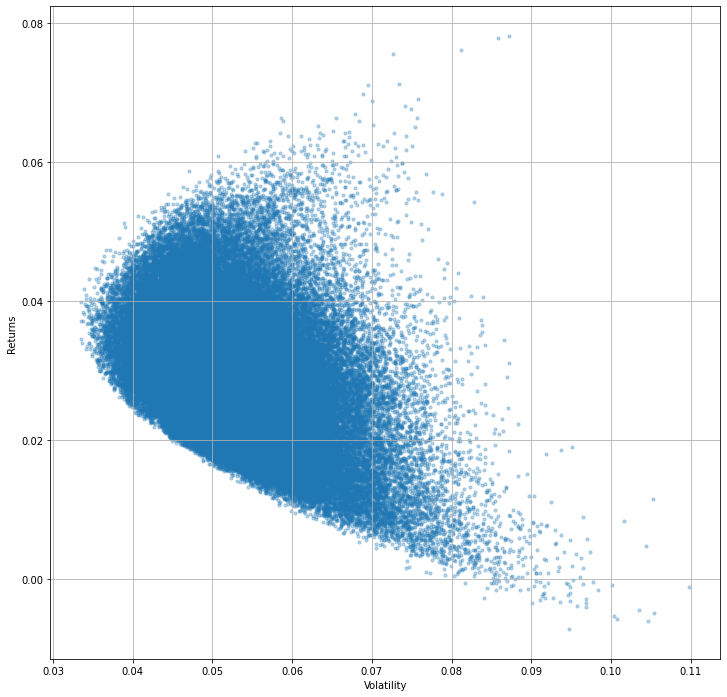

In [ ]:
# Plot efficient frontier
portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[12,12])
plt.xlabel('Volatility')
plt.ylabel('Returns')

**Getting Weights for Lowest Volatility (Lowest Risk Optimal Portfolio)**

In [ ]:
#Getting parameter/weights of the point with minimum volatility
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]
# idxmin() gives us the minimum value in the column specified.                               
min_vol_port

Returns         0.039780
Volatility      0.033478
AAPL weight     0.029422
FB weight       0.098689
GOOGL weight    0.003956
MSFT weight     0.033603
PG weight       0.637509
SBUX weight     0.196820
Name: 82156, dtype: float64

In [ ]:
assets

,Returns,Volatility
AAPL,0.094429,0.108564
FB,0.030680,0.078412
GOOGL,-0.013609,0.106286
MSFT,-0.009967,0.135513
PG,0.044105,0.041105
SBUX,0.031732,0.066192


In [ ]:
#Sharpe Ratio of minimally volatile portfolio
sharpe_ratio_min_vol = min_vol_port[0] / min_vol_port[1]
sharpe_ratio_min_vol

1.1882637247896168

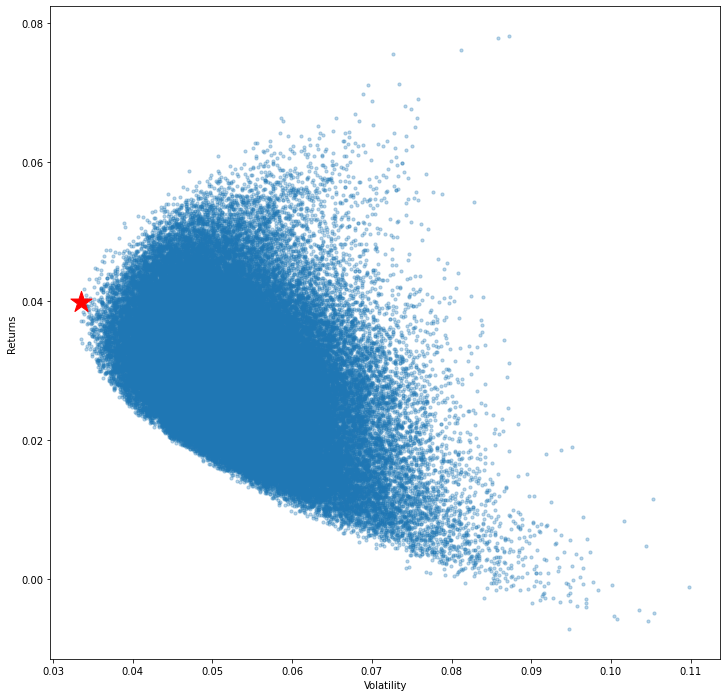

In [ ]:
# plotting the minimum volatility portfolio
plt.subplots(figsize=[12,12])
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)

**Getting Weights for Highest Sharpe Ratio (Highest Risk Optimal Portfolio)**

In [ ]:
# Finding the optimal portfolio (i.e. Highest Sharpe Ratio)

# risk factor(risk-free rate)
rf = 0.0161  #1.61% Average return of Singapore Savings Bonds over 10 years https://www.mas.gov.sg/bonds-and-bills/Singapore-Savings-Bonds

optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]
optimal_risky_port

Returns         0.058667
Volatility      0.047013
AAPL weight     0.334561
FB weight       0.032007
GOOGL weight    0.002796
MSFT weight     0.002687
PG weight       0.503661
SBUX weight     0.124289
Name: 49514, dtype: float64

In [ ]:
assets

,Returns,Volatility
AAPL,0.094429,0.108564
FB,0.030680,0.078412
GOOGL,-0.013609,0.106286
MSFT,-0.009967,0.135513
PG,0.044105,0.041105
SBUX,0.031732,0.066192


In [ ]:
#Sharpe Ratio of Optimally risky portfolio
sharpe_ratio_risky = optimal_risky_port[0] / optimal_risky_port[1]
sharpe_ratio_risky

1.2478846640946017

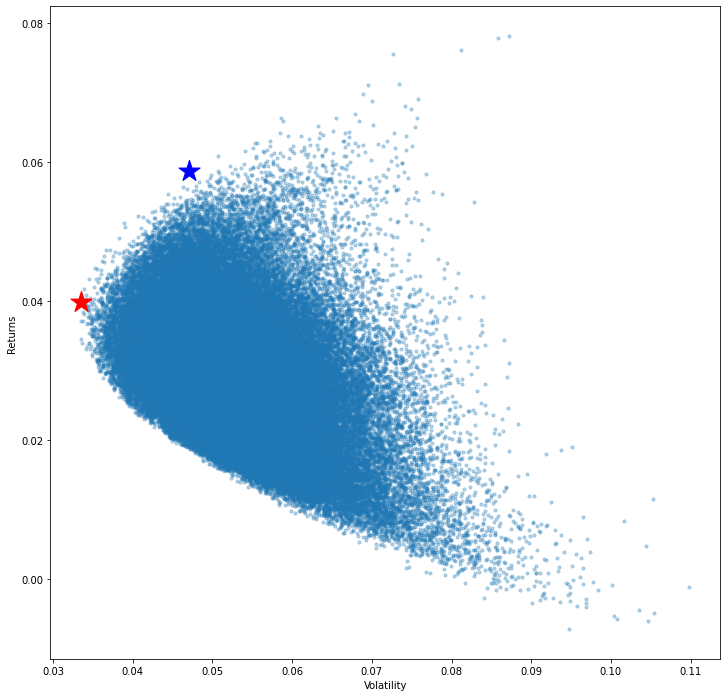

In [ ]:
# Plotting optimal portfolio (Blue Star)
plt.subplots(figsize=(12, 12))
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='b', marker='*', s=500)

**To Extract Table Data (Returns Volatility Weights)**

In [ ]:
portfolios

,Returns,Volatility,AAPL weight,FB weight,GOOGL weight,MSFT weight,PG weight,SBUX weight
0,0.038383,0.051346,0.274177,0.136977,0.154478,0.113405,0.108137,0.212826
1,0.021064,0.058998,0.130030,0.214716,0.250996,0.203467,0.102643,0.098149
2,0.032081,0.042599,0.135868,0.182676,0.160700,0.093404,0.258972,0.168380
3,0.029254,0.038887,0.039420,0.286045,0.153280,0.048379,0.349061,0.123816
4,0.036644,0.052557,0.274558,0.089639,0.307200,0.019276,0.204067,0.105260
...,...,...,...,...,...,...,...,...
99995,0.044378,0.043306,0.247733,0.256120,0.124320,0.002323,0.251930,0.117574
99996,0.043369,0.048069,0.273219,0.043271,0.076467,0.122162,0.251635,0.233246
99997,0.014686,0.055099,0.010557,0.057360,0.329781,0.086399,0.073411,0.442493
99998,0.017116,0.060266,0.091146,0.041494,0.353233,0.160310,0.195112,0.158705


In [ ]:
portfolios.to_csv('portfolios.csv', index=False)

Click "Files" icon on Left tab to download csv